<!-- KODE = "ja", "nei", default "ja" -->



<!-- dom:AUTHOR: TMA4100 Matematikk 1 -->
<!-- Author: -->  
**TMA4100 Matematikk 1**
<!-- dom:TITLE: Euler's method for ordinary differential equations -->
# Euler's method for ordinary differential equations

Date: **Sep 3, 2019**

$\newcommand{mb}[1]{\mathbf{#1}}$




# The method
Consider the initial value problem for the ordinary differential equation:

$$
y'(x) = f(x,y(x)), \quad x\in(x_0,x_{\text{end}});\qquad y(x_0)=y_0.
$$

For $N\in \mathbb N$, we define the step size $h$ and nodes $x_n$ by

$$
h=\dfrac{x_{\text{end}}-x_0}N\qquad \text{and}\qquad x_n=x_0+nh\qquad\text{for}\qquad n=0,1,\dots,N.
$$

Taylor expand the exact solution $y(x_0+h)$ around $x_0$:

$$
y(x_0+h) = y(x_0) + h y'(x_0) + \frac{1}{2}h^2 y''(\xi)
\qquad\text{for some}\qquad \xi\in(x_0,x_0+h).
$$

When $h$ is small (and $y''$ bounded), we see that

$$
y(x_0+h) \approx  y(x_0) + h y'(x_0) = y_0 + hf(x_0, y_0) =: y_{1}.
$$

Repeating this formula, we find numerical solutions $y_n\approx
y(x_n)$ for $n=0,1,\dots,N$: 

**Euler's method:**

* Given a function $f(x,y)$ and an initial value $(x_0,y_0)$.

* Choose a step size $h=\frac{x_{\text{end}}-x_0}N$. 

* For $i=0,1,2,\dotsc, N-1$ 

  * $\displaystyle y_{n+1}  = y_{n} + h f(x_n, y_n)$ 

  * $x_{n+1}=x_n+h$.



# Implementation
Here is a Python implementation in two parts:

* `ode_solver`: This is a generic solver, and can be used by other methods than Euler's. 

* `euler`:      This function does one step of Euler's method. 

Start by calling the necessary modules:

In [6]:
%matplotlib inline

from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [7]:
def euler(f, x, y, h):
    # One step of the Euler method
    y_next = y + h*f(x, y)
    x_next = x + h
    return x_next, y_next

In [8]:
def ode_solver(f, x0, xend, y0, h, method=euler):
    # Generic solver for ODEs
    #    y' = f(x,y), y(a)=y0
    # Input: f, the integration interval x0 and xend, 
    #        the stepsize h and the method of choice.  
    #   
    # Output: Arrays with the x- and the corresponding y-values. 
    
    # Initializing:
    y_num = array([y0])    # Array for the solution y 
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for x and y
    yn = y0 

    # Main loop
    while xn < xend - 1.e-10:            # Buffer for truncation errors        
        xn, yn = method(f, xn, yn, h)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num,xn)
        
    return x_num, y_num

**Example:**
Test the implementation of Euler's method on the problem

$$
y'(x) = -2xy(x), \qquad y(0)=1, \qquad 0 \leq x \leq 1,
$$

for which the exact solution $y(x) = e^{-x^2}$.

Try with different step sizes, for instance $h=0.1$, $h=0.05$ and $h=0.01$. In
each case, compare the numerical solution with the exact one. 

The following script solves the equation numerically.

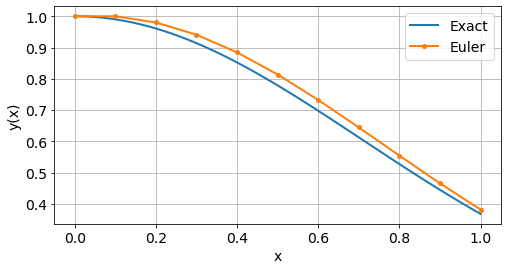

In [9]:
# Numerical experiment 1

# The right hand side of the ODE
def f(x, y):
    return -2*x*y

# The exact solution, for verification
def y_exact(x):
    return exp(-x**2)

x0, xend = 0, 1               # Integration interval
y0 = 1                        # Initial value for y
h = 0.1                       # Stepsize

# Solve the equation
x_num, y_num = ode_solver(f, x0, xend, y0, h)

# Plot of the exact solution
x = linspace(x0, xend, 101)
plot(x, y_exact(x))

# Plot of the numerical solution
plot(x_num, y_num, '.-')

xlabel('x')
ylabel('y(x)')
legend(['Exact', 'Euler']);

We can also make a plot of the error in each step:

Max error =  6.354377308348536e-05


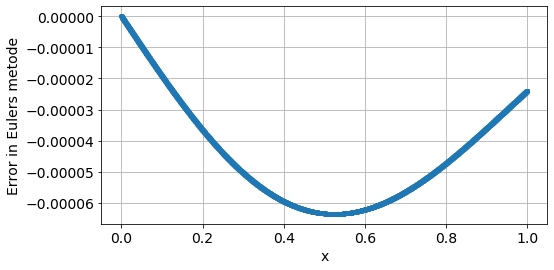

In [11]:
# Calculate and plot the error in the x-values
error = y_exact(x_num)-y_num
plot(x_num, error, '.-')
xlabel('x')
ylabel('Error in Eulers metode')
print('Max error = ', max(abs(error)))  # Print the maximum error

\bigskip
Let $h=\dfrac{x_{end}-x_0}N$ where $N$ is
the number of steps.

What happens to the
the error $e_N = y(x_{end})-y_N$ as $N$ increases? 

**Example:**
Solve the previous example over the interval $[0,1]$.
Use different step sizes $h$, and for each $h$, measure the error at $x=1$.

In [10]:
# Numerical example 2
def f(x, y):                # The right hand side of the ODE
    return -2*x*y

def y_exact(x):            # The exact solution
    return exp(-x**2)

h = 0.1                     # The stepsize
x0, xend = 0, 1             # Integration interval
y0 = 1                      # Initial value

print('n    h                 error         y_num\n---------------------------------------------')

# Main loop
for n in range(10):
    x_num, y_num = ode_solver(f, x0, xend, y0, h)   # Solve the equation 
    error = abs(y_exact(xend)-y_num[-1])            # Error at the end point
    print(format('{:}    {:.3e}        {:.3e}      {:.8}'.format( n,h, error,float(y_num[-1]))))        
    h = 0.5*h                                       # Reduce the stepsize

h           error
---------------------
1.000e-01   1.383e-02
5.000e-02   6.505e-03
2.500e-02   3.157e-03
1.250e-02   1.555e-03
6.250e-03   7.720e-04
3.125e-03   3.846e-04
1.563e-03   1.920e-04
7.813e-04   9.589e-05
3.906e-04   4.792e-05
1.953e-04   2.396e-05


The table generated from this code shows that whenever the step size is reduced
with a factor of 0.5, so is the error. Therefore it seems that
$|y(x_{end}) - y_N| \approx C h$ and that we have a first order method.


**Exercise:**
Repeat the examples 1 and 2 on a [logistic
equation](https://en.wikipedia.org/wiki/Logistic_function#Applications), given
by

$$
y' = y(1-y), \qquad y(0) = y_0,
$$

on the interval $[0,10]$. The exact solution is $y(x) =
\frac{1}{1-(1-\frac{1}{y_0})e^{-x}}$.

Solve the problem numerically when $y_0=0.1$ using different step
sizes $h$. Try
different initial values.